In [19]:
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['savefig.facecolor']='white'
# plt.style.use('seaborn-whitegrid')
# plt.style.use('default')
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
import matplotlib.cm as cm
import json
import os, re

In [20]:
def plot(x, data, method, color, agent_to_plot, order, smooth_radius=200, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    k = method
    v = data[agent_to_plot]
    try:
        plt.plot(x, v[:range], color=color, alpha=0.1, zorder=1)
        plt.plot(x, smooth(v[:range], radius=smooth_radius), color=color, label=k, zorder=order)
    except:
        pass
    
def load_data(file_name):
    file_dir = folder+file_name
    # print(file_dir)
    
    data = json.load( open(file_dir+"/eval.json"))
    # print(data.keys())
    return data

labels = {'nash_dqn': 'Nash DQN', 
        'nash_dqn_exploiter': 'Nash DQN Exploiter', 
        'selfplay2': 'SP', 
        'fictitious_selfplay2': 'FSP', 
        'nxdo2': 'PSRO', 
        'nfsp': 'NFSP', 
        'nash_ppo': 'Nash PPO', 

}

skip_methods = ['nash_ppo']
highlight_methods = ['nash_dqn', 'nash_dqn_exploiter']

/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


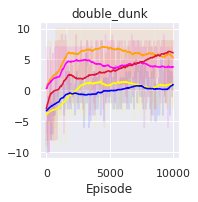

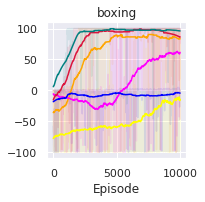

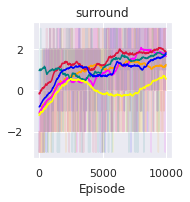

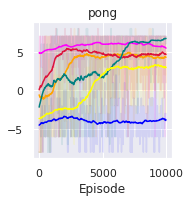

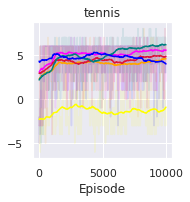

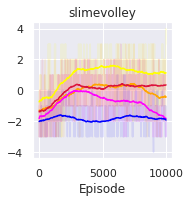

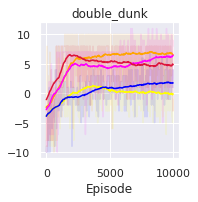

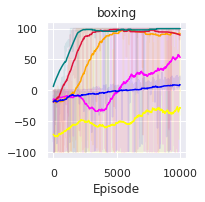

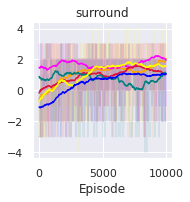

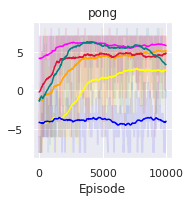

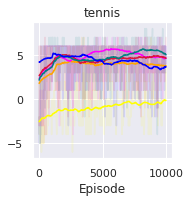

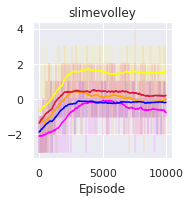

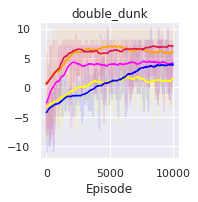

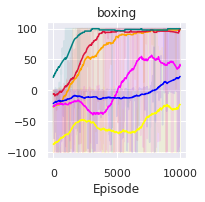

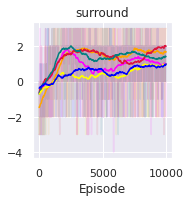

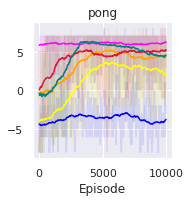

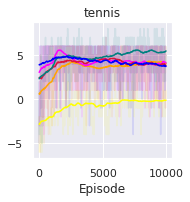

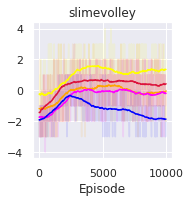

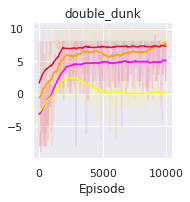

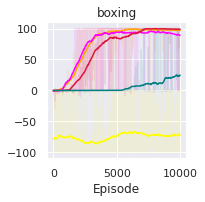

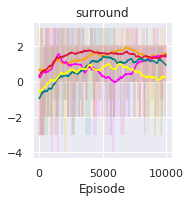

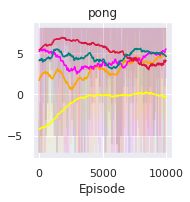

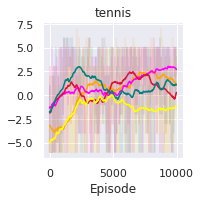

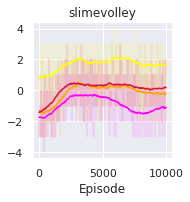

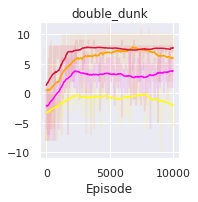

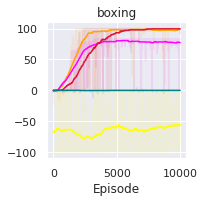

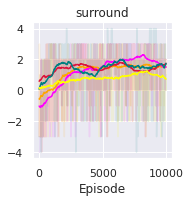

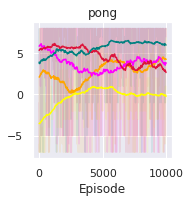

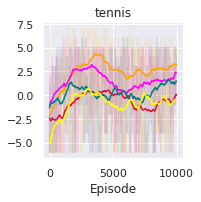

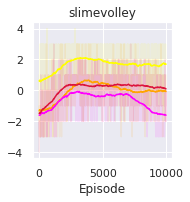

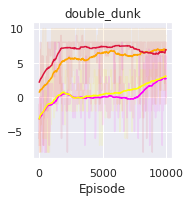

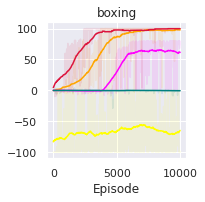

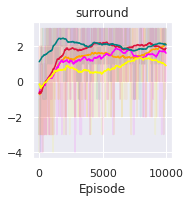

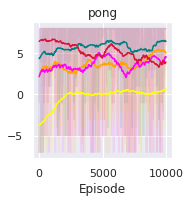

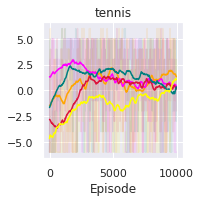

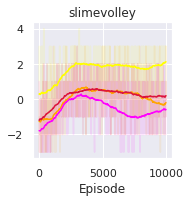

In [26]:
envs = ['double_dunk', 'boxing', 'surround', 'pong', 'tennis', 'slimevolley']
index = '20220429_0152'
exploited_models = ['first', 'second']
times=  ['1', '2', '3']
colors = ['orange', 'yellow',   'blue', 'black','fuchsia', 'crimson', 'teal',]

for exploited_model in exploited_models:
    for t in times:
        os.makedirs(f'{index}_exploit/{exploited_model}_{t}', exist_ok=True)
        folder = f'../data/log/{index}_exploit_{exploited_model}_{t}/'
        files = ! ls $folder
        # print(files)
        if exploited_model == 'first':
            agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
        else:
            agent_to_plot = 'first_0'

        for env in envs:
            env_files =[f for f in files if env in f]
            # print(env_files)

            plt.figure(figsize=(2.5, 2.5))
            plt.clf()
            for f, c in zip(env_files, colors):
                data = load_data(f)
                method = re.split('v(\d+)_', f)[-1] # split with 'v*'

                if method in highlight_methods:
                    order = 3
                else:
                    order = 2
    
                if method in skip_methods:
                    continue

                if method  == 'nash_dqn_exploiter' and agent_to_plot == 'first_0': # no second player exploit 
                    continue

                plot(data['episode'], data['episode_reward'], labels[method], c, agent_to_plot, order, smooth_radius=50)

            # if env == 'slimevolley':
            #     # re-order the legend
            #     handles, ls = plt.gca().get_legend_handles_labels()
            #     new_order = [5,0,3,4,1,2]
            #     plt.legend([handles[i] for i in new_order],[ls[i] for i in new_order], loc=2, ncol=2)

            # plt.grid()
            plt.title(f'{env}')
            plt.xlabel('Episode')
            # plt.ylabel('Exploiter Reward')
            savepath=f'{index}_exploit/{exploited_model}_{t}/compare_exploitation_{env}.png'
            plt.savefig(savepath, bbox_inches='tight', dpi=300)

/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


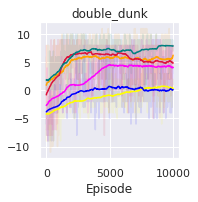

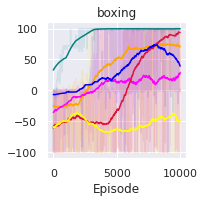

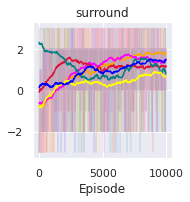

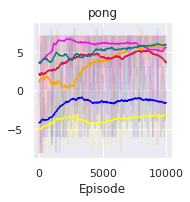

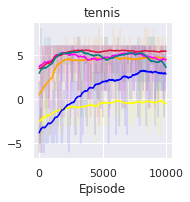

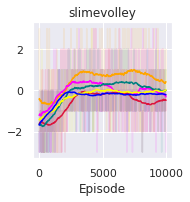

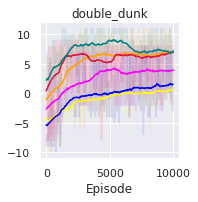

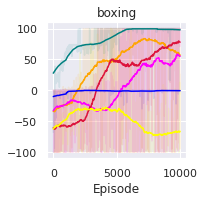

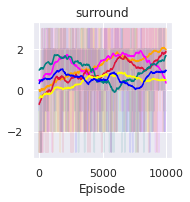

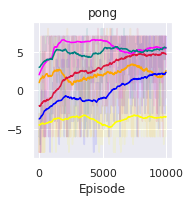

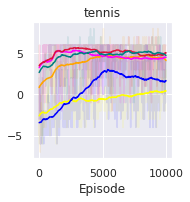

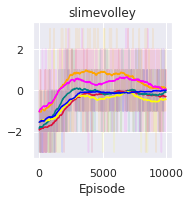

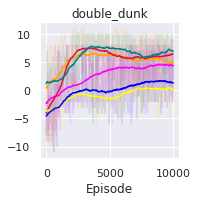

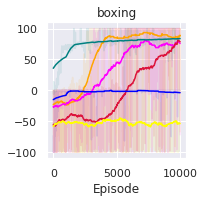

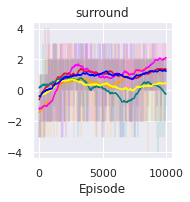

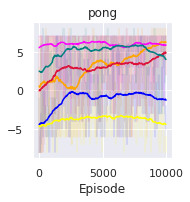

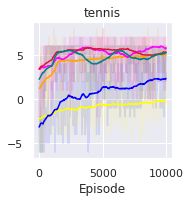

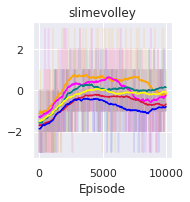

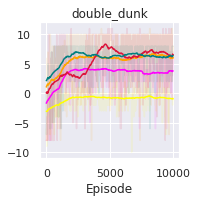

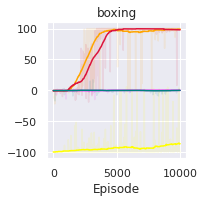

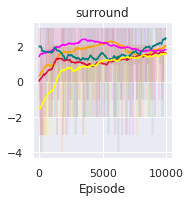

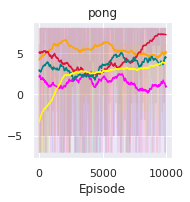

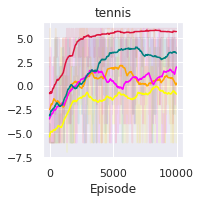

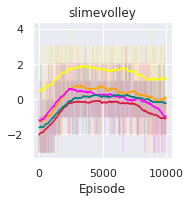

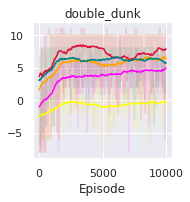

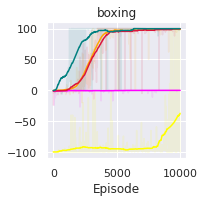

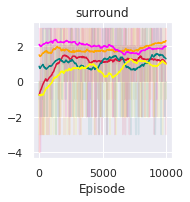

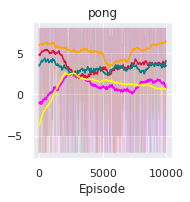

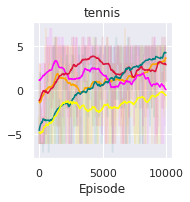

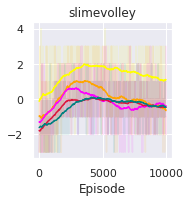

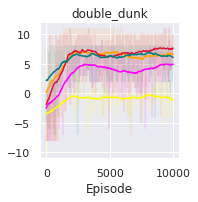

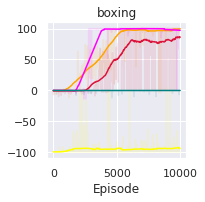

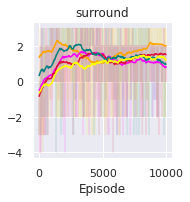

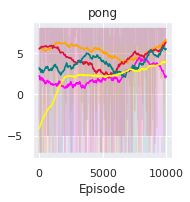

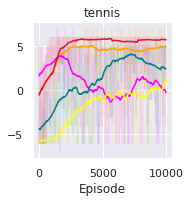

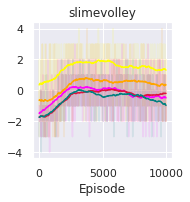

In [27]:
envs = ['double_dunk', 'boxing', 'surround', 'pong', 'tennis', 'slimevolley']
index = '20220427_1507'
exploited_models = ['first', 'second']
times=  ['1', '2', '3']
colors = ['orange', 'yellow',   'blue', 'black','fuchsia', 'crimson', 'teal',]

for exploited_model in exploited_models:
    for t in times:
        os.makedirs(f'{index}_exploit/{exploited_model}_{t}', exist_ok=True)
        folder = f'../data/log/{index}_exploit_{exploited_model}_{t}/'
        files = ! ls $folder
        # print(files)
        if exploited_model == 'first':
            agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
        else:
            agent_to_plot = 'first_0'

        for env in envs:
            env_files =[f for f in files if env in f]
            # print(env_files)

            plt.figure(figsize=(2.5, 2.5))
            plt.clf()
            for f, c in zip(env_files, colors):
                data = load_data(f)
                method = re.split('v(\d+)_', f)[-1] # split with 'v*'

                if method in highlight_methods:
                    order = 3
                else:
                    order = 2
    
                if method in skip_methods:
                    continue

                if method  == 'nash_dqn_exploiter' and agent_to_plot == 'first_0': # no second player exploit 
                    continue

                plot(data['episode'], data['episode_reward'], labels[method], c, agent_to_plot, order, smooth_radius=50)

            # if env == 'slimevolley':
            #     # re-order the legend
            #     handles, ls = plt.gca().get_legend_handles_labels()
            #     new_order = [5,0,3,4,1,2]
            #     plt.legend([handles[i] for i in new_order],[ls[i] for i in new_order], loc=2, ncol=2)

            # plt.grid()
            plt.title(f'{env}')
            # plt.title(f'Exploitation Test-{env}')
            plt.xlabel('Episode')
            # plt.ylabel('Exploiter Reward')
            savepath=f'{index}_exploit/{exploited_model}_{t}/compare_exploitation_{env}.png'
            plt.savefig(savepath, bbox_inches='tight', dpi=300)

/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


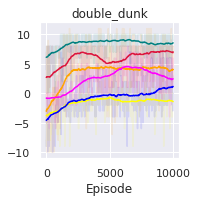

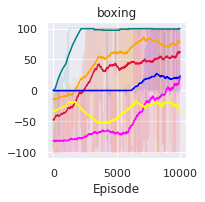

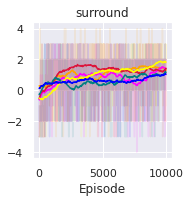

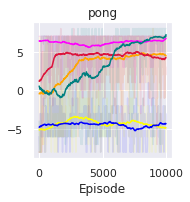

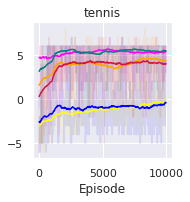

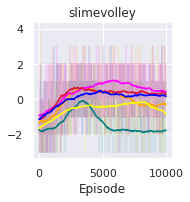

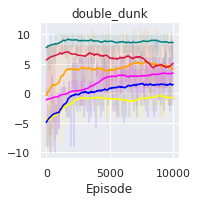

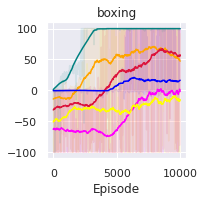

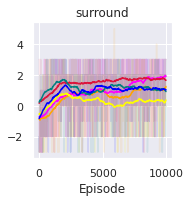

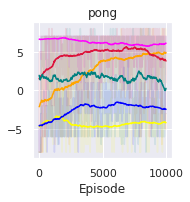

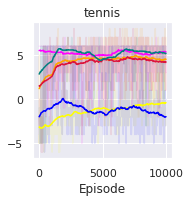

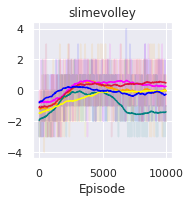

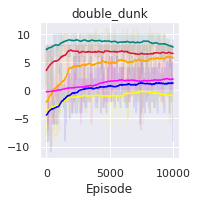

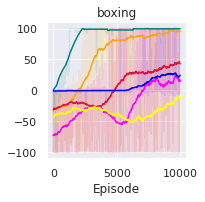

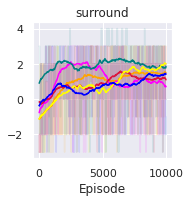

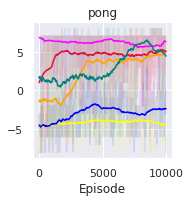

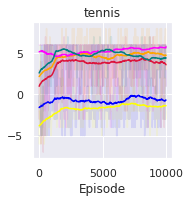

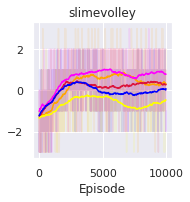

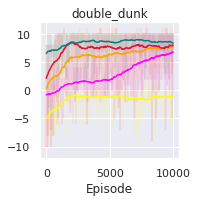

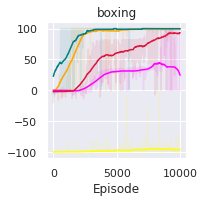

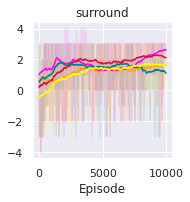

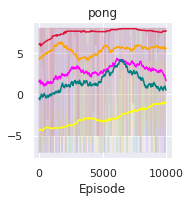

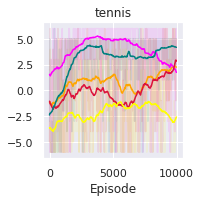

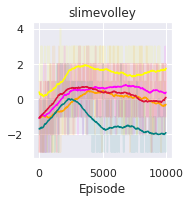

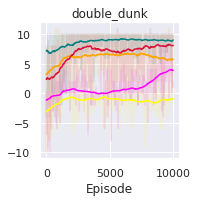

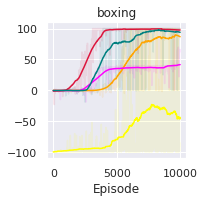

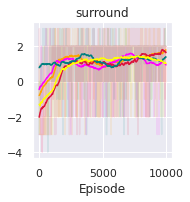

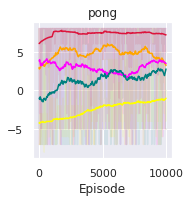

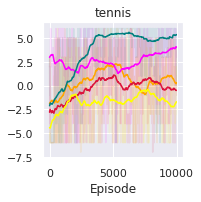

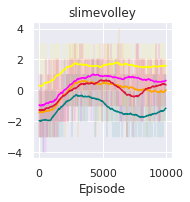

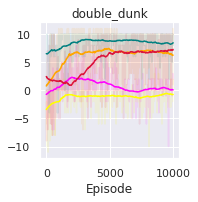

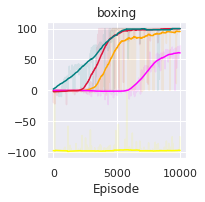

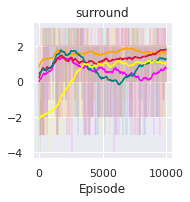

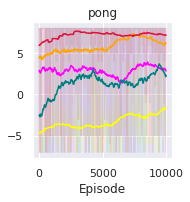

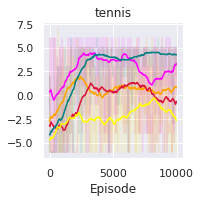

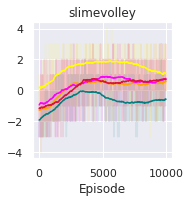

In [28]:
envs = ['double_dunk', 'boxing', 'surround', 'pong', 'tennis', 'slimevolley']
index = '20220421_1855'
exploited_models = ['first', 'second']
times=  ['1', '2', '3']
colors = ['orange', 'yellow',   'blue', 'black','fuchsia', 'crimson', 'teal',]

for exploited_model in exploited_models:
    for t in times:
        os.makedirs(f'{index}_exploit/{exploited_model}_{t}', exist_ok=True)
        folder = f'../data/log/{index}_exploit_{exploited_model}_{t}/'
        files = ! ls $folder
        # print(files)
        if exploited_model == 'first':
            agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
        else:
            agent_to_plot = 'first_0'

        for env in envs:
            env_files =[f for f in files if env in f]
            # print(env_files)

            plt.figure(figsize=(2.5, 2.5))
            plt.clf()
            for f, c in zip(env_files, colors):
                data = load_data(f)
                method = re.split('v(\d+)_', f)[-1] # split with 'v*'

                if method in highlight_methods:
                    order = 3
                else:
                    order = 2
    
                if method in skip_methods:
                    continue

                if method  == 'nash_dqn_exploiter' and agent_to_plot == 'first_0': # no second player exploit 
                    continue

                plot(data['episode'], data['episode_reward'], labels[method], c, agent_to_plot, order, smooth_radius=50)

            # if env == 'slimevolley':
            #     # re-order the legend
            #     handles, ls = plt.gca().get_legend_handles_labels()
            #     new_order = [5,0,3,4,1,2]
            #     plt.legend([handles[i] for i in new_order],[ls[i] for i in new_order], loc=2, ncol=2)

            # plt.grid()
            plt.title(f'{env}')
            plt.xlabel('Episode')
            # plt.ylabel('Exploiter Reward')
            savepath=f'{index}_exploit/{exploited_model}_{t}/compare_exploitation_{env}.png'
            plt.savefig(savepath, bbox_inches='tight', dpi=300)